<a href="https://colab.research.google.com/github/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/blob/main/Hunting_NoteBooks/AI_Assisted_Cloud_Threat_Hunting_Spearphishing_Attachments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI-Assisted Threat Hunting Simulation**
## **Hypothesis**
**"A user may have been compromised through a malicious attachment if an attachment-click event is followed by script-based network activity that downloads a binary payload from an external domain, immediately executed by an executable binary file, and culminates in a PowerShell-driven reverse shell and beaconing activity to external IP/Domains."**




#**Data Sources for Simulation Environments**


## **Microsoft Platform Log Sources (Azure & M365)**

- **Attachment Clicked**  
  Investigated using the `EmailAttachmentInfo` table to identify user interaction with email attachments.

- **Process Execution Analysis**  
  Analyzed process creation and execution activity using the `DeviceProcessEvents` table.

- **Post-Execution Network Analysis**  
  Leveraged the `DeviceNetworkEvents` table to trace outbound and lateral network communications following execution.




## **Google Platform Log Sources (Chronicle UDM – Data Source Details)**

- **Attachment Clicked**  
  Investigated using Chronicle UDM–normalized email telemetry (`email.*` UDM fields) to identify user interaction with email attachments.

- **Process Execution Analysis**  
  Analyzed endpoint process creation and execution activity using Chronicle UDM process events (`process.*` UDM fields).

- **Post-Execution Network Analysis**  
  Leveraged Chronicle UDM network connection telemetry (`network.*` UDM fields) to trace outbound and lateral network communications following execution.


# **Generating Synthetic Logs**

This section outlines a robust methodology for creating realistic, non-harmful synthetic log data for our simulations. By providing a **basic prompt to a large language model (AI)** that details a specific adversarial behavior, we can generate comprehensive event sequences. The crucial step in this process is leveraging the official [Microsoft Advanced Hunting Schema](learn.microsoft.com) and [Google Unified-Data-Model](https://docs.cloud.google.com/chronicle/docs/unified-data-model/udm-usage ) documentation as a structural template. This ensures that every AI-generated log field aligns perfectly with the real-world schema required by security tools, guaranteeing fidelity while maintaining a non-harmful, safe testing environment.




## **Microsoft Platform**

### 📄 **EmailAttachmentInfo Table**
---

### **Synthetic Log Reference**

The complete synthetic dataset for this table is stored in a JSON file and can be accessed here:  
🔗 **[View EmailAttachmentInfo Synthetic Log Dataset (JSON)](https://raw.githubusercontent.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/refs/heads/main/json_data/EmailAttachmentInfo_SpearPhishing.json)**

---

###  **Key Observables in This Table**

| Field | Threat Intelligence Relevance |
|------|-------------------------------|
| **Timestamp** | Establishes the delivery time of the malicious payload, supporting attack timeline reconstruction and correlation with downstream events. |
| **SenderFromAddress** | High-risk indicator of a spoofed or look-alike external domain commonly used in financial phishing and malware delivery campaigns. |
| **SenderDisplayName** | Social-engineering artifact crafted to impersonate a trusted financial authority and increase attachment open rates. |
| **RecipientEmailAddress** | Confirms the specific user targeted, supporting assessment of spear-phishing versus broad campaign activity. |
| **FileName** | Lure-themed filename aligned with financial reporting, consistent with PDF-based malware droppers used in phishing attacks. |
| **FileType** | PDF format is frequently abused to embed malicious scripts or redirectors while evading casual inspection. |
| **SHA256** | Primary immutable indicator enabling threat-intel enrichment, malware family correlation, and sandbox detonation validation. |
| **ThreatTypes** | Confirms classification as malware rather than pure phishing, indicating payload-based execution risk. |
| **ThreatNames** | Identifies the malware family and behavior (PDF-based trojan dropper), aiding campaign and TTP correlation. |








### ⚙️ **DeviceProcessEvents Table**

The full JSON dataset for these events is available here:  
🔗 **[View DeviceProcessEvents Synthetic Log Dataset (JSON)](https://raw.githubusercontent.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/refs/heads/main/json_data/DeviceProcessEvents_SpearPhishing.json)**

---

### **Key Observables in This Table**

| Field | Threat Intelligence Relevance |
|------|-------------------------------|
| **InitiatingProcessFileName** | Adobe Reader acting as the parent process strongly indicates malicious document–driven execution originating from a PDF lure. |
| **ProcessFileName** | `cmd.exe` execution represents a common pivot used to spawn scripted or LOLBin-based payloads post user interaction. |
| **ProcessCommandLine** | High-fidelity indicator showing chained abuse of PowerShell and `rundll32.exe` to download and execute a malicious DLL. |
| **InitiatingProcessCommandLine** | Confirms the specific document opened by the user, enabling direct correlation to the phishing attachment. |
| **ProcessCreationTime** | Enables precise timeline reconstruction between document open, command execution, and subsequent network activity. |
| **AdditionalFields** | Preserves linkage to the original email message and attachment hash, validating end-to-end attack progression. |


---



### 🌐 **DeviceNetworkEvents Table**

The full JSON dataset for these events is available here:  
🔗 **[View DeviceNetworkEvents Synthetic Log Dataset (JSON)](https://raw.githubusercontent.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/refs/heads/main/json_data/DeviceNetworkEvents_SpearPhishing.json)**

---

### **Key Observables in This Table**

| Field | Threat Intelligence Relevance |
|------|-------------------------------|
| **RemoteUrl** | Points to attacker-controlled cloud-hosted infrastructure delivering a malicious DLL, consistent with living-off-the-cloud abuse patterns. |
| **InitiatingProcessFileName** | PowerShell is abused as a native LOLBin to download and stage the next payload without dropping obvious tooling. |
| **InitiatingProcessCommandLine** | High-confidence malicious behavior showing hidden PowerShell execution retrieving a DLL into a user-writable temp directory. |
| **InitiatingProcessSHA256** | Strong indicator for malware correlation, detonation results, and campaign tracking across environments. |
| **Parent Process Relationship** | Execution chain (`cmd.exe → powershell.exe`) aligns with post-phishing payload execution techniques. |
| **AdditionalFields** | Provides critical linkage back to the original email attachment via message and file hash correlation, confirming attack progression. |


---



## **Google Platform**

###**About UDM schema**

> The image provided illustrates the structure of the Google Unified Data Model (UDM), a standardized schema used in Google Security Operations (Chronicle) to normalize security event data from various sources into a consistent format.

* **Metadata:** This is the core section of every event, providing a basic description of when the event occurred (event_timestamp) and its type (event_type), such as PROCESS_LAUNCH, NETWORK_HTTP, or USER_LOGIN. It also includes information about the product and vendor that generated the original log.

* **Principal**: The primary entity (user or device) that performed the activity.

* **Target**: The object or system that was acted upon (e.g., a file, process, or destination device).

* **Process**: Information related to an executing process, including its pid (Process ID), command_line, and parent_process details.

* **Network**: High-level network details for events involving communication, like session IDs, direction, and bytes transferred.



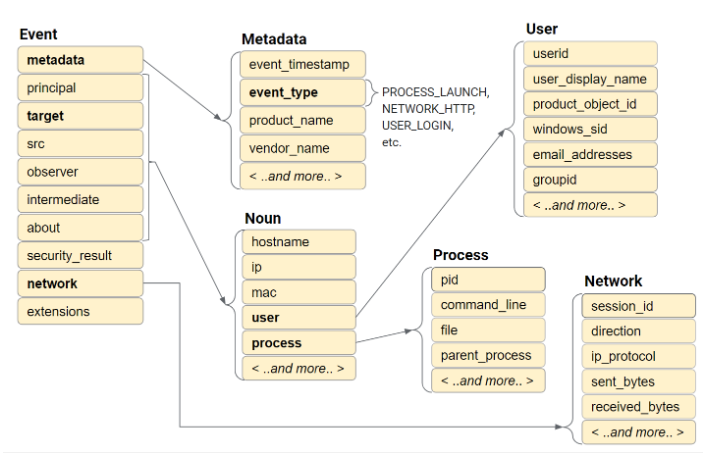




### 📄 **Chronicle UDM (EmailUDMEvents)**
---

### **Synthetic Log Reference**

The complete synthetic dataset for this table is stored in a JSON file and can be accessed here:  
🔗 **[View EmailUDMEvents Synthetic Log Dataset (JSON)](https://raw.githubusercontent.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/refs/heads/main/json_data_Google/EmailUDMEvents_SpearPhishing.json)**

---

###  **Key Observables in This Format**

| Field | Threat Intelligence Relevance |
|------|-------------------------------|
| **metadata.event_timestamp** | Establishes the initial delivery time of the malicious email, serving as the anchor point for cross-domain attack timeline correlation. |
| **network.email.from / to** | Identifies the external sender and targeted internal recipient, supporting phishing campaign scoping and victim identification. |
| **about.file.display_name** | Confirms the attachment name used as a financial lure, consistent with document-based malware delivery tactics. |
| **security_result.threat_name** | Provides malware family attribution, enabling campaign tracking and enrichment across threat-intel sources. |
| **security_result.severity** | Indicates high-confidence malicious classification, prioritizing the event for investigation and response. |
| **metadata.product_log_id** | Unique message identifier allowing pivoting across Chronicle UDM datasets for end-to-end email-to-endpoint correlation. |







### ⚙️ **Chronicle UDM (DeviceProcessUDMEvents)**
---

### **Synthetic Log Reference**

The complete synthetic dataset for this table is stored in a JSON file and can be accessed here:  
🔗 **[View DeviceProcessUDMEvents Synthetic Log Dataset (JSON)](https://raw.githubusercontent.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/refs/heads/main/json_data_Google/DeviceProcessUDMEvents_SpearPhishing.json)**

---

###  **Key Observables in This Format**

| Field | Threat Intelligence Relevance |
|------|-------------------------------|
| **metadata.event_timestamp** | Marks the precise execution moment of Stage-2 activity, enabling alignment with prior email delivery and subsequent network events. |
| **principal.process.command_line** | Confirms initial user interaction with the malicious PDF, establishing the transition from delivery to execution. |
| **target.process.command_line** | High-fidelity indicator showing `cmd.exe` spawning obfuscated PowerShell to download and execute a secondary payload. |
| **target.process.parent_process.file.full_path** | Deep execution-chain context proving document-based execution (`AcroRd32.exe → cmd.exe`), a classic phishing-to-payload pattern. |
| **security_result.severity_details** | Analyst-grade detection rationale highlighting suspicious child process creation, reinforcing malicious intent despite allow action. |
| **principal.file.full_path** | Validates the legitimate application abused for execution, supporting LOLBin and trusted-process abuse analysis. |


### 🌐 **Chronicle UDM (DeviceNetworkUDMEvents)**
---

### **Synthetic Log Reference**

The complete synthetic dataset for this table is stored in a JSON file and can be accessed here:  
🔗 **[View DeviceNetworkUDMEvents Synthetic Log Dataset (JSON)](https://raw.githubusercontent.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/refs/heads/main/json_data_Google/DeviceNetworkUDMEvents_SpearPhishing.json)**

---

###  **Key Observables in This Format**

| Field | Threat Intelligence Relevance |
|------|-------------------------------|
| **metadata.event_timestamp** | Pinpoints the exact moment of outbound C2-style communication, enabling correlation with preceding process execution events. |
| **principal.hostname / principal.ip** | Identifies the compromised endpoint and internal source IP responsible for initiating the malicious network session. |
| **target.url / target.ip** | Represents attacker-controlled infrastructure hosting the secondary payload, critical for infrastructure-based threat hunting. |
| **network.http.user_agent** | Deep nested indicator revealing PowerShell-based HTTP requests masquerading as a browser, a common malware download technique. |
| **about.file.sha256 / about.file.full_path** | Confirms successful payload retrieval and on-disk creation, enabling file-based IOC enrichment and containment actions. |
| **security_result.category** | High-confidence classification of malicious network activity, validating the event as part of an active infection chain. |


# **Exploration (with AI Assisted queries)**

## **AI-Driven Exploration for Potential Threats**

* **Leveraging AI**: We can utilize AI to identify both potential and obvious indicators of malicious activity.
* **Verification with AI**: By using AI tools, we can verify suspicious events and answer key investigative questions.

### **Key Exploration Questions**:
* **Malicious Attachment Delivery**: Was a malicious attachment delivered to a user?
* **Unusual User Activity**: Was the same user involved in any unusual network or script-based activity?
* **Outbound Script Activity**: Was any script-based outbound connection initiated shortly after email delivery?
* **Binary Execution**: Was there any binary execution tied to the observed activity?

> We will also verify if all the above questions are successfully fetching the required details from our synthetic logs and the Data Explorer platform.


## **Microsoft Platform**

* In this phase, we will explore our Microsoft-based synthetic telemetry using Azure Data Explorer. After generating the synthetic logs and storing them in [GitHub](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/tree/main/json_data) as JSON files, we will create the required tables and schemas through the Azure Data Explorer interface. The ingestion will also be performed directly in the ADX environment using KQL ingestion commands.

* Once the data is ingested, we will begin interactive exploration of the tables using KQL. Throughout this process, AI assistants such as ChatGPT, Gemini, and other copilots will be used to help generate and refine exploration queries. This approach allows us to quickly test hypotheses, inspect event flows, and better understand how the synthetic data reflects each stage of the attack chain.



### **Malicious Attachment Delivery: Was a malicious attachment delivered to a user?**

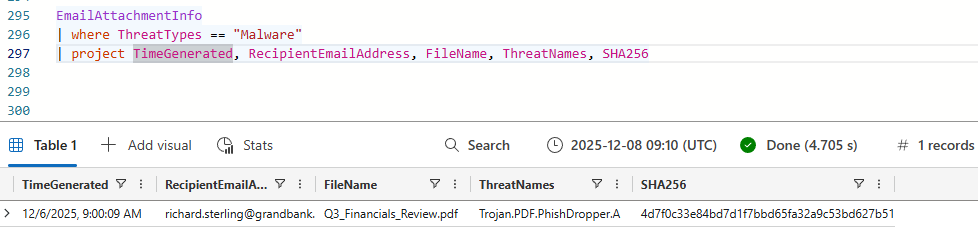






### **Unusual User Activity: Was the same user involved in any unusual network or script-based activity?**

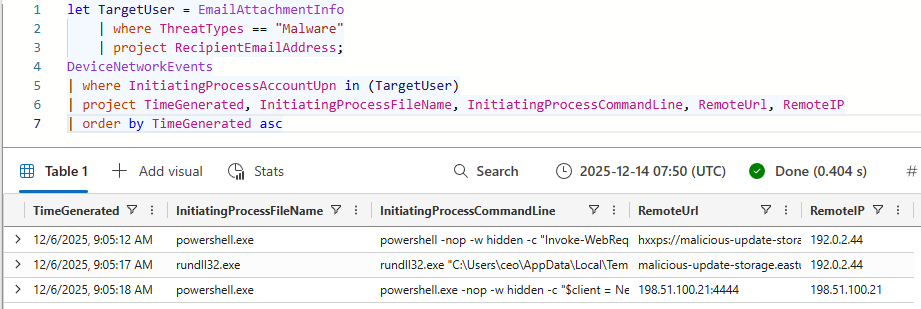

### **Outbound Script Activity: Was any script-based outbound connection initiated shortly after email delivery?**

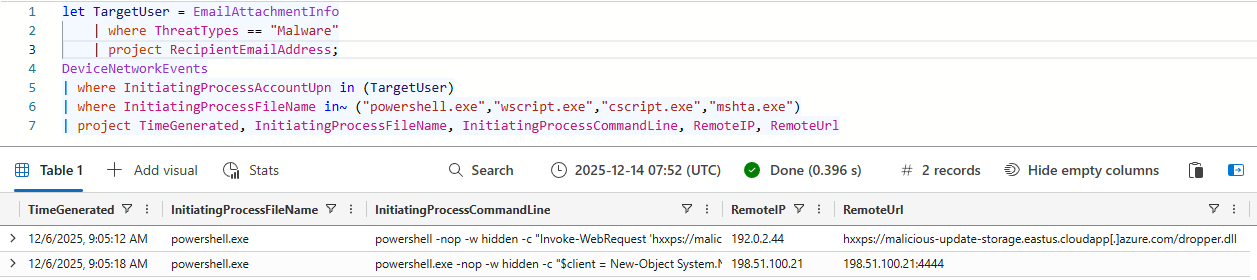

### **Binary Execution: Was there any binary execution tied to the observed activity?**
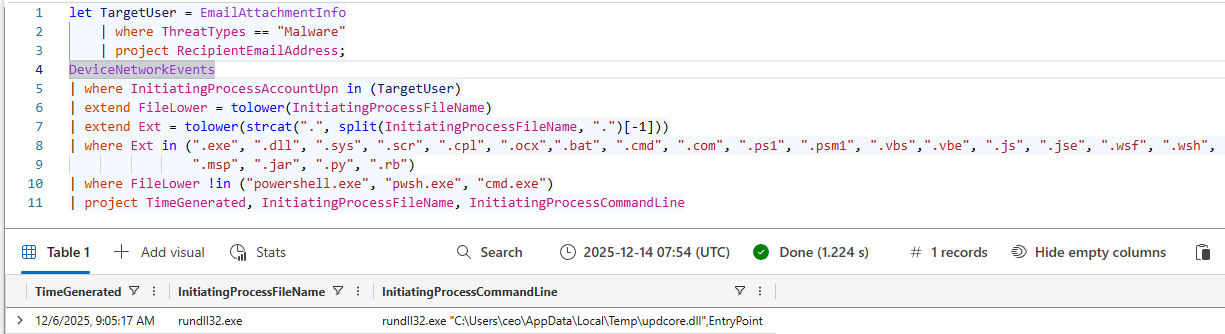

## **Google Platform**



### **Malicious Attachment Delivery: Was a malicious attachment delivered to a user?**

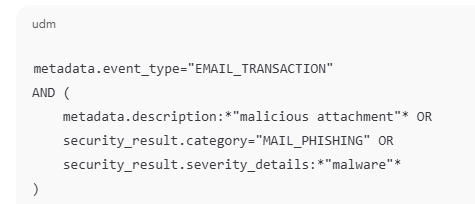
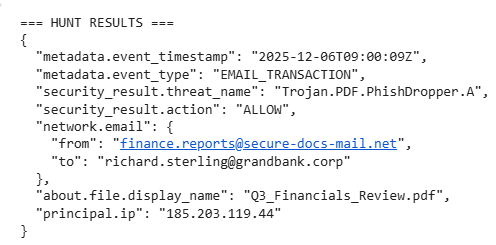


### **Unusual User Activity: Was the same user involved in any unusual network or script-based activity?**

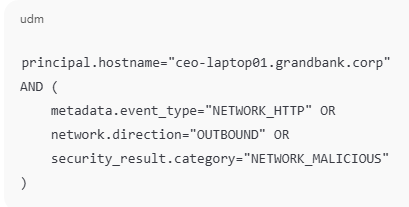

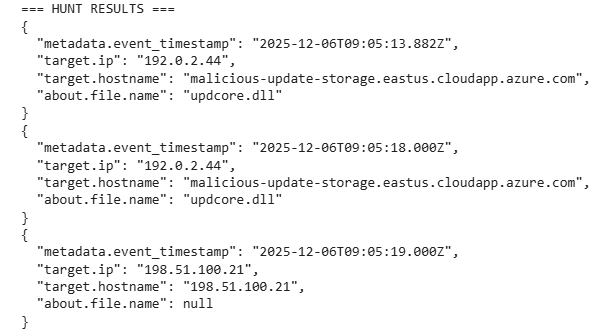

# **Investigation (MITRE Mapping)**

## **Investigation Phase Overview**

After completing the **exploration phase** and validating that our queries return accurate and relevant telemetry, we transition into the **investigation phase**. In this phase, we operationalize our hypothesis by crafting focused hunting queries that help reconstruct the attack flow across email, endpoint, and network telemetry.

The objective is to understand **sequence, timing, and relationships** between events, and to determine whether the observed behavior aligns with known adversary tradecraft or automated execution patterns. This structured analysis allows us to validate malicious intent and scope the activity effectively.

#### **Key Investigation Questions**

- **How long after the malicious email did the process launch?**  

- **How quickly did the outbound network beacon fire after execution?**  

- **Does the timing match known attacker tradecraft or automated execution?**  

- **What are the grandparent, parent, and child process relationships?**  

- **How many IPs, domains, or other IOCs are involved?**  



## **AI Assisted Hunting Queries:**

### **Microsoft Platform**


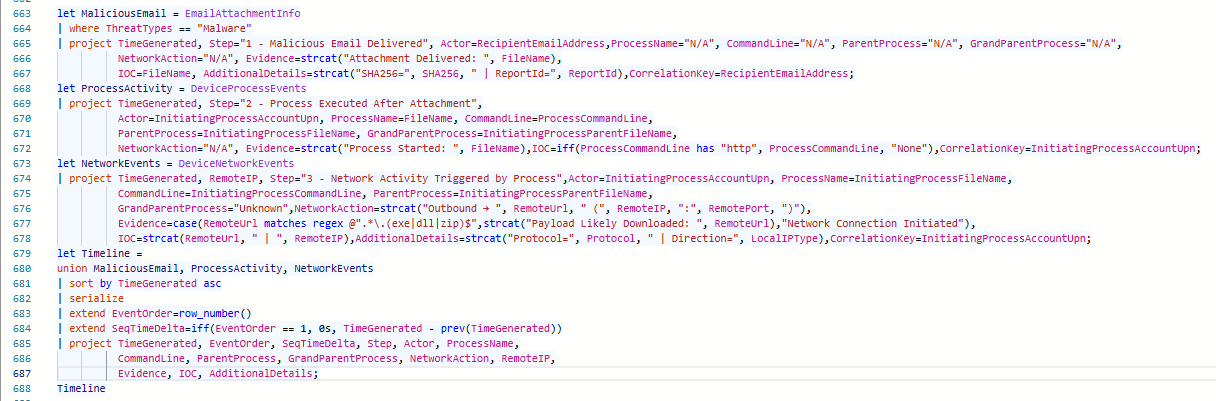

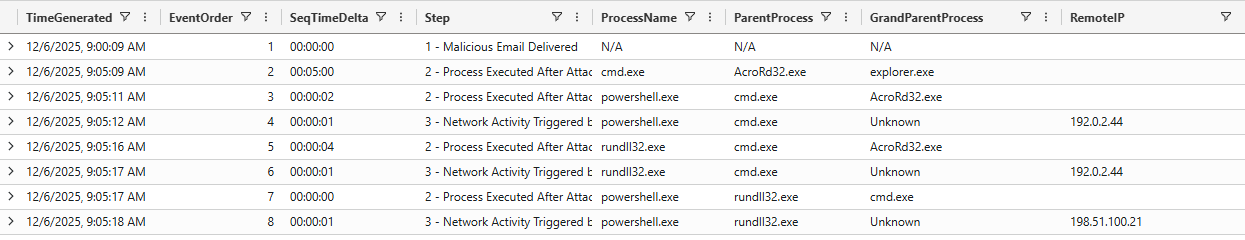

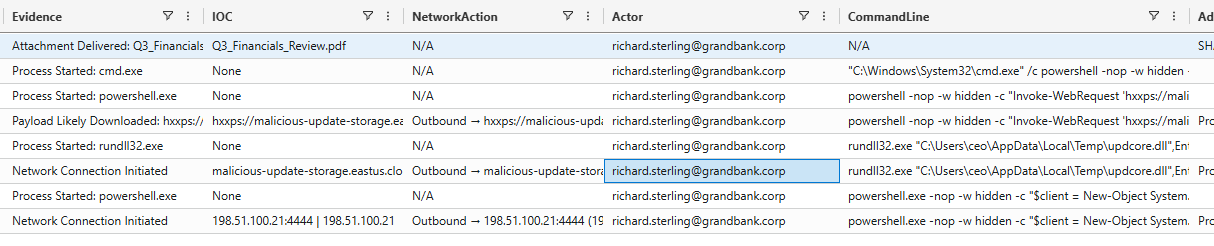

### **Google Platform**

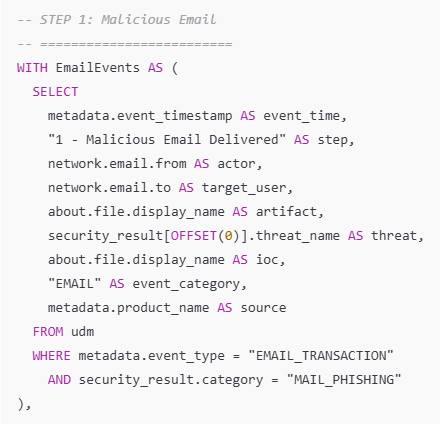

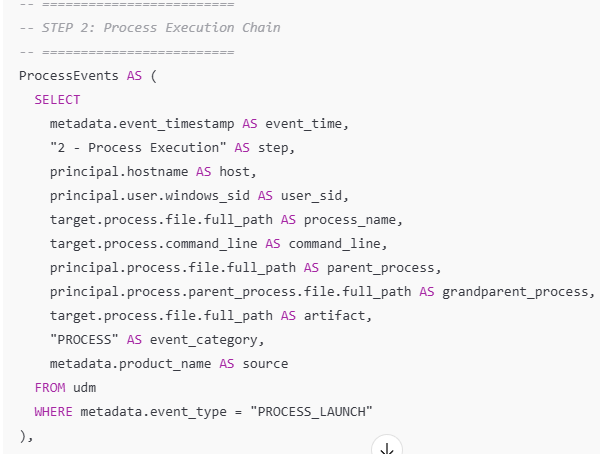

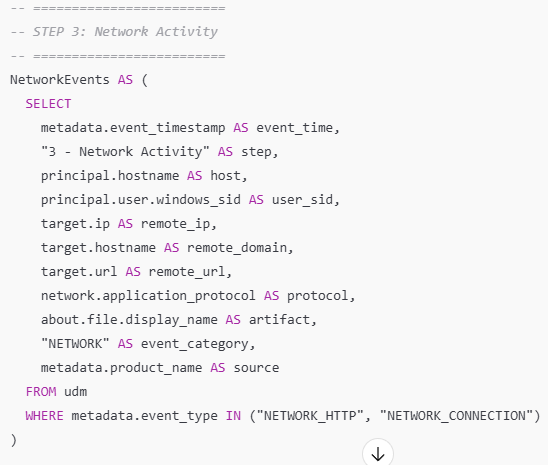

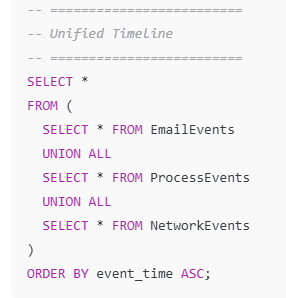


## **Investigation Findings (AI Assisted Query-Driven Answers)**

**Q: How long after the malicious email did the process launch?**  
**A:** The first process execution (`cmd.exe`) occurred **~5 minutes after email delivery** (09:05:09 vs 09:00:09), indicating delayed but likely user-triggered execution.

**Q: How quickly did the outbound network beacon fire after execution?**  
**A:** Outbound network activity was observed **within 1–2 seconds** of `powershell.exe` execution, suggesting automated payload retrieval rather than manual interaction.

**Q: Does the timing match known attacker tradecraft or automated execution?**  
**A:**
 | Time       | Step     | Key Insight                      |
|------------|----------|---------------------------------|
| 09:00:09   | Email    | PDF delivered                   |
| 09:05:10   | Process  | PDF opened (AcroRd32.exe)       |
| +1–2 sec   | Process  | `cmd.exe` → `powershell.exe` launched |
| +3 sec     | Network  | Malicious DLL (`updcore.dll`) downloaded |
| +5 sec     | Process  | `rundll32.exe` executed to run DLL |
| +1 sec     | Network  | Beacon / telemetry outbound     |
| +1 sec     | Network  | Reverse shell connection        |

- **Execution latency:** Less than 6 minutes from email delivery to initial process execution  
- **Beacon timing:** Less than 5 seconds after process execution  

This timing strongly supports **automated malware tradecraft** rather than manual or human-driven activity..

**Q: What are the grandparent, parent, and child relationships?**  
**A:**  
- **explorer.exe → AcroRd32.exe → cmd.exe**
- **AcroRd32.exe → cmd.exe → powershell.exe**  
- **cmd.exe → powershell.exe → rundll32.exe**
- **rundll32.exe → powershell.exe → network connection**

**Q: How many IPs, domains, or other IOCs are involved?**  
**A:**  
- **Domains:** `malicious-update-storage.eastus.cloudapp.azure.com`  
- **IPs:** `192.0.2.44`, `198.51.100.21`  
- **File IOC:** `Q3_Financials_Review.pdf`, `updcore.dll`  
This indicates **multi-stage infrastructure usage** rather than a single beacon endpoint.


## **MITRE ATT&CK TTP Mapping (Validated Execution Chain)**


| Event IDs | Time (Approx)  | Tactic / Category           | Technique ID  | Technique Name / Description                                                                                                                     |
| --------- | -------------- | --------------------------- | ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ |
| 1         | **9:00:09 AM** | Initial Access              | **T1566.001** | **Phishing: Spearphishing Attachment** — Malicious email with PDF attachment (`Q3_Financials_Review.pdf`) delivered to user mailbox.             |
| 2         | **9:05:09 AM** | Execution                   | **T1059.003** | **Command and Scripting Interpreter: Windows Command Shell** — `cmd.exe` spawned (parent: `AcroRd32.exe`) after user opens malicious attachment. |
| 3         | **9:05:11 AM** | Execution                   | **T1059.001** | **PowerShell** — `powershell.exe -nop -w hidden` launched from `cmd.exe`.                                                                        |
| 4         | **9:05:12 AM** | Command and Control         | **T1105**     | **Ingress Tool Transfer** — PowerShell downloads payload from external host `192.0.2.44` (`Invoke-WebRequest`).                                  |
| 5         | **9:05:16 AM** | Execution / Defense Evasion | **T1218.011** | **Signed Binary Proxy Execution: Rundll32** — `rundll32.exe` executed, loading dropped DLL from user temp directory.                             |
| 6         | **9:05:17 AM** | Command and Control         | **T1071.001** | **Application Layer Protocol: Web Protocols** — `rundll32.exe` initiates outbound HTTP traffic to `192.0.2.44`.                                  |
| 7         | **9:05:17 AM** | Execution                   | **T1059.001** | **PowerShell** — Secondary `powershell.exe` instance spawned by `rundll32.exe`.                                                                  |
| 8         | **9:05:18 AM** | Command and Control         | **T1095**     | **Non-Application Layer Protocol** — PowerShell establishes raw TCP connection to `198.51.100.21:4444`.                                          |
| 8         | **9:05:18 AM** | Command and Control         | **T1571**     | **Non-Standard Port** — C2 communication over TCP port `4444`.                                                                                   |



# **Validation Phase – Alert Fatigue & False Positive Reduction**

## **Objective**
Validate that the hunting queries and detections built from **synthetic adversarial activity** remain:
- **High-fidelity**
- **Low-noise**
- **Operationally viable**
before exposure to **production security telemetry**.

This phase focuses on **eliminating alert fatigue and false positives** while preserving detection coverage for real-world attacker behavior.

---

## **Why Validation Is Critical in BAS**
In real enterprise environments, hunting queries run across **30–90 days of telemetry**, where:
- Benign administrative actions
- Power users’ automation
- IT scripts, updates, and monitoring agents  
generate patterns that often **overlap with attacker TTPs**.

Without a dedicated validation phase, detections built only on attack data:
- Over-trigger in production
- Erode SOC trust
- Become disabled or ignored

---

## **Validation Approach Can be Used in This Simulation**

### **1. Dual-Track Synthetic Data Generation**
Two parallel synthetic datasets are created:

**A. Adversarial Dataset**
- Phishing → Execution → DLL proxy → C2
- Explicit MITRE-mapped attacker behavior
- Deterministic, repeatable, labeled attack events

**B. Normal Business Dataset**
- Domain-specific benign activity (business-expert driven)
- Examples:
  - PowerShell used by IT operations
  - Rundll32 invoked by legitimate installers
  - Outbound HTTP from enterprise applications
  - Scheduled scripts and patching workflows
- User-centric behavior across roles (standard user, IT admin, automation account)

Both datasets are **time-distributed** to emulate **90-day operational telemetry**.

---

## **2. Query Validation Against Mixed Telemetry**
Hunting queries are executed against:
- **Attack-only synthetic logs**
- **Benign-only synthetic logs**
- **Combined (attack + normal) datasets**

This enables validation of:
- Signal exclusivity
- Context sensitivity
- Noise amplification points

---

## **3. Alert Fatigue Evaluation Criteria**
Each detection is evaluated using:

- **Trigger Rate**  
  Does the query fire excessively in benign datasets?

- **Context Dependence**  
  Does it rely on a *single action* or a *sequence of behaviors*?

- **User Role Sensitivity**  
  Does it incorrectly flag expected admin or automation behavior?

- **Temporal Correlation**  
  Does it require unrealistic time windows that inflate alerts?

---

## **4. False Positive Reduction Techniques Applied**
Based on validation results, queries are refined using:

- **Behavioral chaining**
  - Email → Process → Network correlation
- **Process lineage enforcement**
  - Parent / grandparent constraints
- **Command-line intent filtering**
  - Suspicious flags vs operational patterns
- **Network destination context**
  - Known update endpoints vs anomalous IPs
- **User & device baselining**
  - First-seen behavior vs historical norms

This mirrors **real SOC tuning workflows** without risking production disruption.

---

## **5. Outcome of the Validation Phase**
After iterative validation:

- High-noise detections are:
  - Suppressed
  - Converted into *context-dependent signals*
- High-confidence detections are:
  - Preserved
  - Elevated to alerting use-cases
- Remaining logic is:
  - Hunt-only (analyst-driven)
  - Not automated into alerts

---




# **Protection (Prepare Sigma rules + detection)**

> The logic is built from a defensible hypothesis linking **email delivery → execution → network retrieval → secondary execution → external command-and-control** in a correlated timeline.

---
## 🛠 **How the Detection Works (CSP-Agnostic)**

This detection logic is structured into a **multistage event correlation model**:

### 🔹 1. Attachment Delivery
- Identify email/IM events with attachments.
- Focus on signatures or engines tagging attachments as malicious.

### 🔹 2. Script / Interpreter Launch
- Detect execution of scripts or interpreters (**PowerShell, cmd, bash, sh, python, etc.**).
- Filter on command-line patterns indicative of payload retrieval (`Invoke-WebRequest`, `curl`, `wget`, etc.).

### 🔹 3. External Payload Download
- Monitor network connection logs for:
  - HTTP(S) requests to untrusted hosts
  - Remote executables or suspicious file types (`.exe`, `.dll`, `.bin`)
  - Downloads not matching known enterprise update domains

### 🔹 4. Secondary Execution via Proxy
- Observe execution of binaries commonly abused as proxies (**LOLBins**) such as `rundll32`, `regsvr32`, `mshta`, etc.
- Check for non-standard DLL load behavior or unknown payload execution.

### 🔹 5. Outbound C2 / Shell Activity
- Detect beaconing or reverse shell patterns:
  - Non-standard high-port connections
  - Long-lived sessions to external IPs
  - Tunnel-like behavior using HTTP, DNS, WebSocket, or raw TCP

---
## 📁 **Implementation Reference**

An example Sigma rule and pattern detection logic based on this hypothesis are available in the public repo:

👉 **[SpearPhishing.yml](https://github.com/Ashis-Palai/AI-Powered-Cloud-Threat-Hunting-Simulations/tree/main/Sigma_Detection)**

